#### Machine Learning com Python

#### Conteúdo - Bases e Notebook da aula

https://github.com/FIAP/Pos_Tech_DTAT/tree/61a634996879d5c1384af6f567e29659ad68b727


#### Dicionário de Variáveis – Dataset Rolling Stones 🎸

Este dicionário descreve as colunas presentes no arquivo `dataset_rolling_stones.xlsx`, com base nos metadados da API do Spotify.



##### 📌 Metadados Gerais

| Coluna         | Descrição                                                                 |
|----------------|---------------------------------------------------------------------------|
| `name`         | Nome da faixa (título da música).                                         |
| `album`        | Nome do álbum ao qual a faixa pertence.                                   |
| `release_date` | Data de lançamento do álbum ou faixa, no formato YYYY-MM-DD.              |
| `track_number` | Posição da faixa dentro do álbum.                                         |
| `duration_ms`  | Duração da faixa em milissegundos.                                        |
| `popularity`   | Índice de popularidade da faixa no Spotify (0 a 100).                     |

##### 🎵 Atributos Musicais (Audio Features)

Estes atributos são fornecidos pela [Spotify Web API – Audio Features](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).

| Coluna              | Descrição                                                                                                                                     |
|---------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| `acousticness`      | Grau de confiança de que a faixa é acústica (0.0 a 1.0). Valores próximos de 1.0 indicam alta probabilidade de ser acústica.                  |
| `danceability`      | Indica o quão dançável é uma faixa com base em ritmo, batida e estabilidade (0.0 a 1.0).                                                      |
| `energy`            | Mede a intensidade e atividade da faixa (0.0 a 1.0). Faixas com alta energia são geralmente rápidas, altas e ruidosas.                        |
| `instrumentalness`  | Probabilidade da faixa não conter vocais. Valores acima de 0.5 sugerem conteúdo instrumental.                                                 |
| `liveness`          | Estima a presença de público. Valores acima de 0.8 sugerem que a faixa foi gravada ao vivo.                                                  |
| `loudness`          | Volume médio da faixa em decibéis (dB), geralmente entre -60 e 0 dB. Valores mais altos indicam faixas mais altas.                            |
| `speechiness`       | Mede a presença de palavras faladas. Valores altos (>0.66) indicam fala pura, como audiobooks ou podcasts.                                   |
| `tempo`             | Estimativa de batidas por minuto (BPM). Indica o tempo da faixa.                                                                              |
| `valence`           | Mede a positividade emocional da música (0.0 = som triste, 1.0 = som feliz).                                                                  |


##### 🔗 Fontes

- [Spotify Web API – Audio Features](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)
- [Spotify Popularity Metric](https://community.spotify.com/t5/Spotify-for-Developers/Popularity-of-a-track/td-p/919620)
- [Songstats Blog – Popularity Explained](https://blog.songstats.com/understanding-spotify-track-popularity/)

#### Importação de pacotes, bibliotecas e funções (def)

In [3]:
# Importar biblioteca completa
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import timeit
import seaborn as sns

# Importar função especifica de um módulo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [4]:
#Função para categorizar os tomates 

def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return "tomate_medio"
    elif media <40:
        return "tomate_pequeno"
    else:
        return "tomate_grande"

In [5]:
#Função para categorizar os tomates usando numpy 

def categorizar_tomate_media_np(df: pd.DataFrame, coluna: str, nova_coluna: str):

    # Condições
    condicoes = [
        (df[coluna] >= 40) & (df[coluna] <= 70),
        (df[coluna] < 40),
        (df[coluna] >70)
    ]

    # Valores associados às condições
    tipos = [
        "tomate_medio",
        "tomate_pequeno",
        "tomate_grande"
    ]

    df[nova_coluna] = np.select(condicoes, tipos, default="Não definido")

In [6]:
def classifica_musica_ao_vivo(df):
    if df["liveness"] >= 0.8:
        return True
    else:
        return False


#### Aula 1 - Bibliotecas Fundamentais e Primeiros Passos em ML

In [7]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
df_excel = pd.read_excel("https://github.com/FIAP/Pos_Tech_DTAT/raw/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Chess.xlsx",sheet_name="Chess", engine= "calamine")

In [8]:
df_csv = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Tomato.csv", sep= ",")

In [9]:
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


In [10]:
df_csv.tail()

,Date,Unit,Minimum,Maximum,Average,Market
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato
2740,2021-05-13,Kg,35,40,37.5,Tomato


In [11]:
# Forma resumida do total de linhas e colunas do data frame 
df_csv.shape

(2741, 6)

In [12]:
# Resumo da base de dados com mais informações
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [13]:
# Fazer uma estatistica descritiva dos dados 
df_excel.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,6.321335e+16,6.313080e+16,60.465999,1596.631868,1588.831987,4.816981
std,7.292307e+16,7.290633e+16,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.498313e+12,1.498315e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.504366e+12,1.504367e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.486680e+17,1.486680e+17,79.000000,1793.000000,1784.000000,6.000000
max,1.504470e+17,1.504470e+17,349.000000,2700.000000,2723.000000,28.000000


In [14]:
# Fazer uma estatistica descritiva dos dados de forma transposta
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,6.321335e+16,7.292307e+16,1.376772e+12,1.498313e+12,1.504366e+12,1.486680e+17,1.504470e+17
last_move_at,20058.0,6.313080e+16,7.290633e+16,1.376772e+12,1.498315e+12,1.504367e+12,1.486680e+17,1.504470e+17
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


In [15]:
# Variações de informações de uma coluna - ± igual ao distinct do SQL
set(df_excel["victory_status"])

{'draw', 'mate', 'outoftime', 'resign'}

In [16]:
# Criar nova coluna categoria_tomate usando a função
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_tomate_media)
df_csv.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate_pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate_pequeno


In [17]:
# Criar nova coluna categoria_tomate usando a função com numpy
df_teste = df_csv.copy()
df_teste["categoria_tomate"] = categorizar_tomate_media_np(df_teste,"Average", "categoria_tomate")
df_teste.head()

# Criar um novo data frame apenas para usar no teste
df_teste_apply = df_csv.copy()

# Comparar o tempo das duas funções: 
numero_rep = 1

tempo_apply = timeit.timeit(
    "df_teste_apply['Average'].apply(categorizar_tomate_media)",
    globals=globals(),
    number=numero_rep
)
print(f"Média tempo apply ({numero_rep} execuções): {tempo_apply/numero_rep:.6f} segundos")

tempo_numpy = timeit.timeit(
    "categorizar_tomate_media_np(df_teste, 'Average', 'categoria_tomate')",
    globals=globals(),
    number=10
)
print(f"Média tempo numpy ({numero_rep} execuções): {tempo_numpy/numero_rep:.6f} segundos")

Média tempo apply (1 execuções): 0.002046 segundos
Média tempo numpy (1 execuções): 0.033196 segundos


In [18]:
df_csv.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate_grande      149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate_medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate_pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate_grande      149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate_medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate_pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate_grande     7.367396  70.5  75.0  77.5  82.5  117.5  
tomate_medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate_pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

In [19]:
df_csv.groupby(["categoria_tomate"]).describe().T

categoria_tomate  tomate_grande  tomate_medio  tomate_pequeno
Minimum count        149.000000    954.000000     1638.000000
        mean          75.744966     47.818658       23.978022
        std            7.324666      8.203065        7.175572
        min           65.000000     30.000000        8.000000
        25%           70.000000     40.000000       18.000000
        50%           75.000000     45.000000       25.000000
        75%           80.000000     55.000000       30.000000
        max          115.000000     65.000000       38.000000
Maximum count        149.000000    954.000000     1638.000000
        mean          82.583893     55.009434       29.528694
        std            7.622070      8.541910        7.323327
        min           73.000000     42.000000       12.000000
        25%           80.000000     50.000000       25.000000
        50%           80.000000     55.000000       30.000000
        75%           85.000000     60.000000       35.000000
        max          120.000000     75.000000       44.000000
Average count        149.000000    954.000000     1638.000000
        mean          79.164430     51.414046       26.753358
        std            7.367396      8.272792        7.191735
        min           70.500000     40.000000       10.000000
        25%           75.000000     45.000000       21.500000
        50%           77.500000     50.000000       27.500000
        75%           82.500000     57.500000       32.500000
        max          117.500000     70.000000       39.500000

In [20]:
#Realizar filtro com loc 
filtro = df_csv["Average"] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate_pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate_pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate_pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate_pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate_pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate_pequeno


In [21]:
# Criar uma lista ou array
arr_list = np.array([1,2,3,4,5,6,7,8])
print(arr_list)

[1 2 3 4 5 6 7 8]


In [22]:
# Criar uma matriz de 0 
arr_zeros = np.zeros((4,6)) # qtd de linhas e colunas
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [23]:
# Criar uma matriz de 1
arr_ones = np.ones((3,4)) # qtd de linhas e colunas
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [24]:
# Criar uma matriz aleatoria 
arr_random = np.random.rand(3,4) # qtd de linhas e colunas
print(arr_random)

[[0.98743981 0.96129622 0.23467638 0.8718089 ]
 [0.8665373  0.1982009  0.31126461 0.84972661]
 [0.63341022 0.15606113 0.72901677 0.64425222]]


In [25]:
# Verificar o tipo de dimensão
print(arr_random.shape)

(3, 4)


In [26]:
# Mudar a estrutura da matriz 

arr_random_reshape = arr_random.reshape((4,3))
print(arr_random_reshape)

[[0.98743981 0.96129622 0.23467638]
 [0.8718089  0.8665373  0.1982009 ]
 [0.31126461 0.84972661 0.63341022]
 [0.15606113 0.72901677 0.64425222]]


In [27]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr3 = np.array([[9,10],[11,12]])

In [28]:
# Concatenar os array
arr4 = np.concatenate((arr1,arr2,arr3), axis=1) 
arr4

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [29]:
# Separar os dados 
arr4_split = np.split(arr4,2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


In [30]:
# Transpo a matriz
arr4_transpose= np.transpose(arr4)
print(arr4_transpose)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


In [31]:
# Voltar a matriz como era antes
arr4_revertido = arr4_transpose.T
arr4_revertido

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [32]:
# Criar os array
arr_a = np.array([1,7,27])
arr_b = np.array([1,5,1])

# Somar as matrizes
arr_a_b = np.add(arr_a , arr_b)
arr_a_b

array([ 2, 12, 28])

In [33]:
# Subtrair as matrizes
arr_sub_a_b = np.subtract(arr_a,arr_b)
arr_sub_a_b

array([ 0,  2, 26])

In [34]:
# Converter para date 
df_tomato = df_csv.copy()
df_tomato["Date"] = pd.to_datetime(df_tomato["Date"])
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


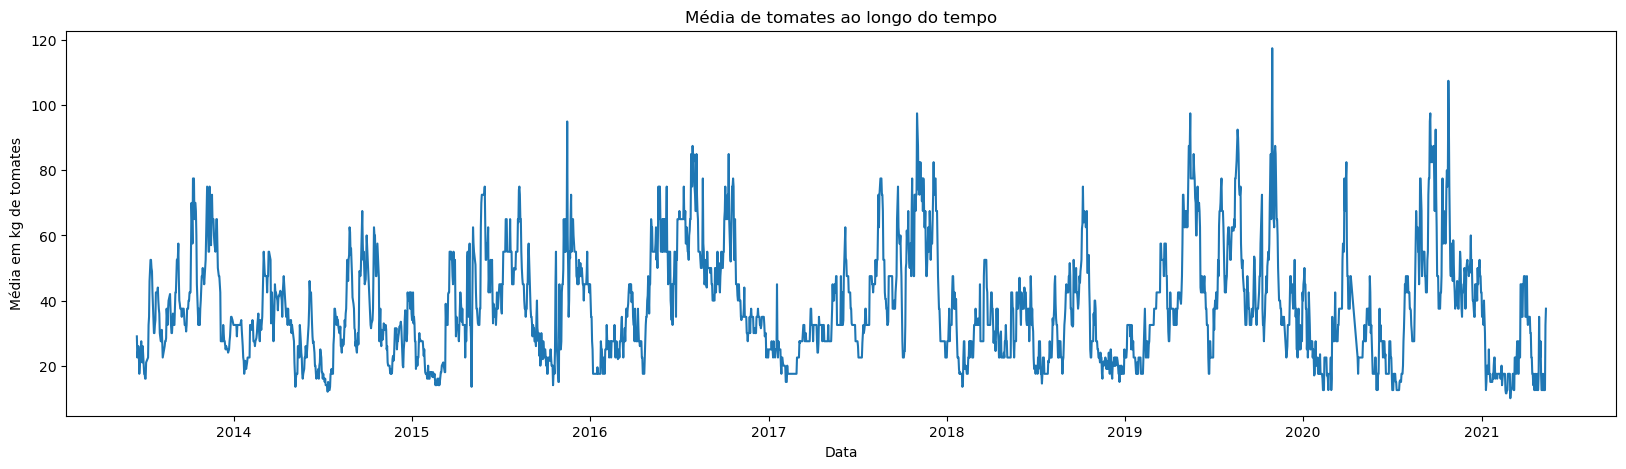

In [35]:
# Plotar grafico de linha

plt.figure(figsize=(20,5)) # Tamanho do grafico
plt.plot(df_tomato["Date"],df_tomato["Average"]) # informado o eixo x e y para plotar o grafico 
plt.xlabel("Data") # Nome do eixo x 
plt.ylabel("Média em kg de tomates") # Nome do eixo y
plt.title("Média de tomates ao longo do tempo") # Titulo do grafico
plt.show()

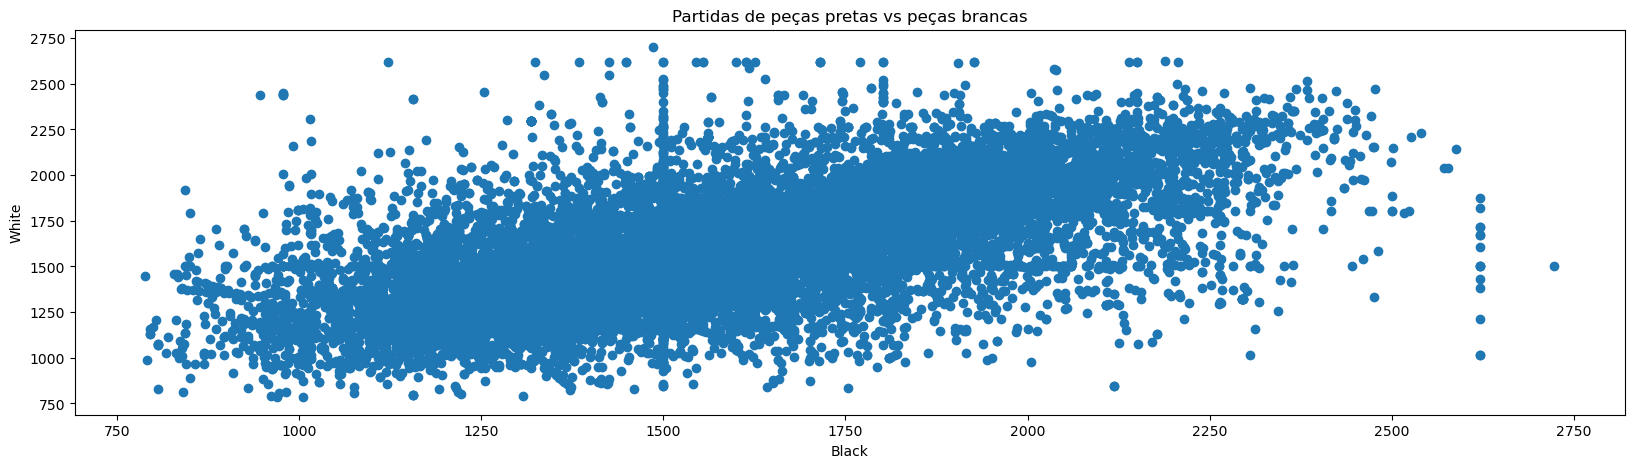

In [36]:
# Plotar grafico de dispersão 

df_chess = df_excel.copy()

plt.figure(figsize=(20,5)) # Tamanho do grafico
plt.scatter(df_chess["black_rating"],df_chess["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("Partidas de peças pretas vs peças brancas")
plt.show()


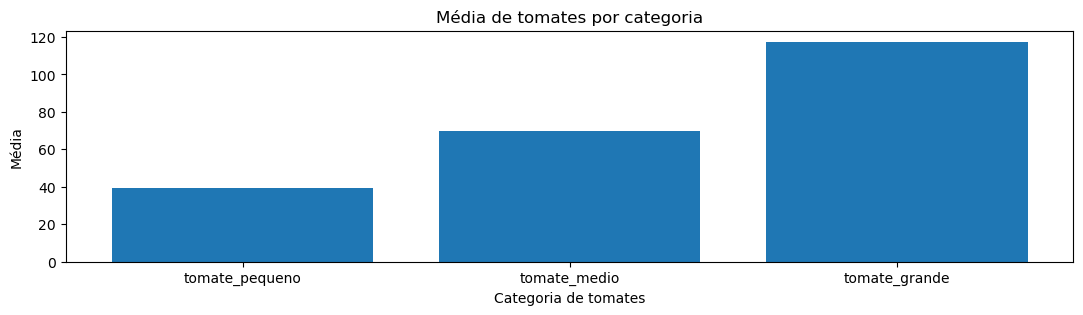

In [37]:
# Plotar grafico de barras 

plt.figure(figsize=(13,3)) # Tamanho do grafico
plt.bar(df_tomato["categoria_tomate"],df_tomato["Average"])
plt.xlabel("Categoria de tomates")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

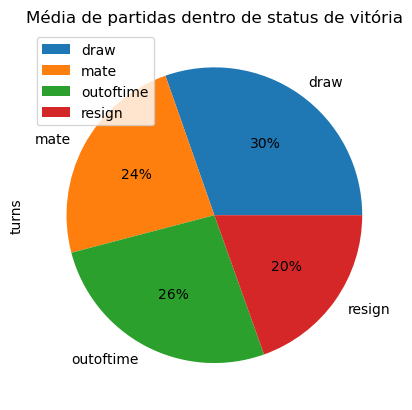

In [38]:
# Plotar grafico de pizza 

df_chess.groupby(["victory_status"]).mean(numeric_only=True).plot(kind="pie", y="turns", autopct="%1.0f%%")
plt.title("Média de partidas dentro de status de vitória")
plt.show()

In [39]:
df_diabetes = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/diabetes.csv", sep= ",")

In [40]:
# Para esse cenario vamos trabalhar com o modelo supervisionada
# Supervisionado = Temos caracteristica e temos respostas 

df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
# Todos os dados com as informações, execto a Class variable -> Caracteristicas
x = df_diabetes.drop(["Class variable"], axis=1)

In [42]:
# Coluna com a classificação se a pessoa tem ou não diabetes -> Classificação/target/alvo
y = df_diabetes["Class variable"] 

In [43]:
# O train_test_split é usado para fazer a separação da base em teste e treino 
x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=0.3)

In [44]:
len(x_train)

537

In [45]:
df_diabetes.shape

(768, 9)

In [46]:
len(x_teste)

231

In [47]:
# knn classificar o dado proximo (vizinho)
knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
# código para treinar
knn.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
accuracy = knn.score(x_teste, y_teste)

In [50]:
accuracy

0.670995670995671

#### Aula 2 - Análise Exploratória de Dados (EDA)

In [51]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
df = pd.read_excel("https://github.com/FIAP/Pos_Tech_DTAT/raw/61a634996879d5c1384af6f567e29659ad68b727/Aula%2003/Base%20de%20Dados/dataset_rolling_stones.xlsx",sheet_name="Planilha1", engine= "calamine")

In [52]:
df.head(10)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.00,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.00,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.00,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.00,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.00,0.2060,32,305106
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.125000,0.741,-5539.0,0.0915,101628.00,0.1250,31,244293
6,Angie - Live,Licked Live In NYC,2022-06-10,7,0.5610,0.262,0.810,0.000003,0.972,-6851.0,0.0969,77.52,0.3940,31,245506
7,Let It Bleed - Live,Licked Live In NYC,2022-06-10,8,0.3170,0.413,0.971,0.000267,0.993,-5509.0,0.0873,128958.00,0.4840,30,313586
8,Midnight Rambler - Live,Licked Live In NYC,2022-06-10,9,0.4160,0.268,0.942,0.040800,0.959,-6018.0,0.1190,139452.00,0.2850,30,781173
9,Tumbling Dice - Live,Licked Live In NYC,2022-06-10,10,0.4010,0.310,0.944,0.075200,0.974,-5074.0,0.1280,119782.00,0.1880,29,333413


In [53]:
# Verificando as informações do data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [54]:
# Verificar a qtd de linhas e colunas
df.shape

(1610, 15)

In [55]:
# Primeiro album lançado
print("Data inicial:  ", df["release_date"].min())

Data inicial:   1964-04-16 00:00:00


In [56]:
# Ultimo album lançado
print("Data inicial:  ", df["release_date"].max())

Data inicial:   2022-06-10 00:00:00


In [57]:
# Verificar dados nulos
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [58]:
# Verificar dados duplicados
df.duplicated().sum()

6

In [59]:
# Verificar as linhas duplicadas
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [60]:
# Verificando os dados duplicados
# Como os dados duplicados estão iguais, entendo que poderia remover
df.query("album == 'Some Girls (Deluxe Version)'").sort_values(by='name')

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
911,Beast Of Burden - Remastered 1994,Some Girls (Deluxe Version),1978-06-09,9,0.3900,0.783,0.878,0.000778,0.0426,-3864.0,0.0308,100626.00,0.885,30,265173
933,Beast Of Burden - Remastered 1994,Some Girls (Deluxe Version),1978-06-09,9,0.3900,0.783,0.878,0.000778,0.0426,-3864.0,0.0308,100626.00,0.885,29,265173
932,Before They Make Me Run - Remastered,Some Girls (Deluxe Version),1978-06-09,8,0.3840,0.595,0.955,0.017500,0.0500,-2304.0,0.1170,132653.00,0.714,18,204960
910,Before They Make Me Run - Remastered,Some Girls (Deluxe Version),1978-06-09,8,0.3840,0.595,0.955,0.017500,0.0500,-2304.0,0.1170,132653.00,0.714,19,204960
913,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.3830,-4386.0,0.1280,105124.00,0.364,17,222253
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.3830,-4386.0,0.1280,105124.00,0.364,17,222253
937,Do You Think I Really Care,Some Girls (Deluxe Version),1978-06-09,3,0.0969,0.609,0.902,0.005580,0.3270,-4282.0,0.0273,146733.00,0.952,21,262240
915,Do You Think I Really Care,Some Girls (Deluxe Version),1978-06-09,3,0.0969,0.609,0.902,0.005580,0.3270,-4282.0,0.0273,146733.00,0.952,20,262240
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.3850,-5871.0,0.0390,127329.00,0.847,15,246266
918,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.3850,-5871.0,0.0390,127329.00,0.847,15,246266


In [61]:
# Gerar estatistica descritivas
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [62]:
# Gerar estatistica descritivas de forma transposto
df.describe().T.sort_index()

,count,mean,min,25%,50%,75%,max,std
acousticness,1610.0,0.250475,0.000009,0.05835,0.183,0.40375,0.994,0.227397
danceability,1610.0,0.46886,0.104,0.36225,0.458,0.578,0.887,0.141775
duration_ms,1610.0,257736.488199,21000.0,190613.0,243093.0,295319.75,981866.0,108333.47492
energy,1610.0,0.792352,0.141,0.674,0.8485,0.945,0.999,0.179886
instrumentalness,1610.0,0.16417,0.0,0.000219,0.01375,0.179,0.996,0.276249
liveness,1610.0,0.49173,0.0219,0.153,0.3795,0.89375,0.998,0.3491
loudness,1610.0,-6406.640075,-24408.0,-8829.5,-6179.0,-4254.75,-2.31,3474.285941
popularity,1610.0,20.788199,0.0,13.0,20.0,27.0,80.0,12.426859
release_date,1610,1992-04-23 12:57:14.534161536,1964-04-16 00:00:00,1970-09-04 00:00:00,1986-03-24 00:00:00,2017-12-01 00:00:00,2022-06-10 00:00:00,NaN
speechiness,1610.0,0.069512,0.0232,0.0365,0.0512,0.0866,0.624,0.051631


In [63]:
# Criar uma coluna com a duracao em minutos
df["duracao_em_min"] = df["duration_ms"] / 60000
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [64]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


In [65]:
df.groupby("album")["duracao_em_min"].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

In [66]:
df_maior_duracao_musica = df.groupby("album")["duracao_em_min"].mean().sort_values(ascending=False)
df_maior_duracao_musica



album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duracao_em_min, Length: 90, dtype: float64

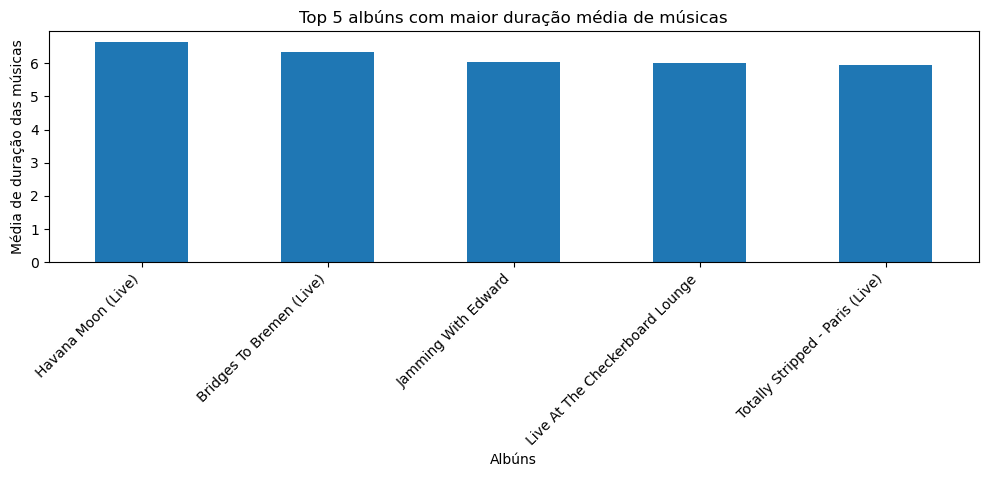

In [67]:
df_maior_duracao_musica.head(5).plot(kind="bar", figsize=(12,3))
plt.xlabel("Albúns")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Média de duração das músicas")
plt.title("Top 5 albúns com maior duração média de músicas")
plt.show()

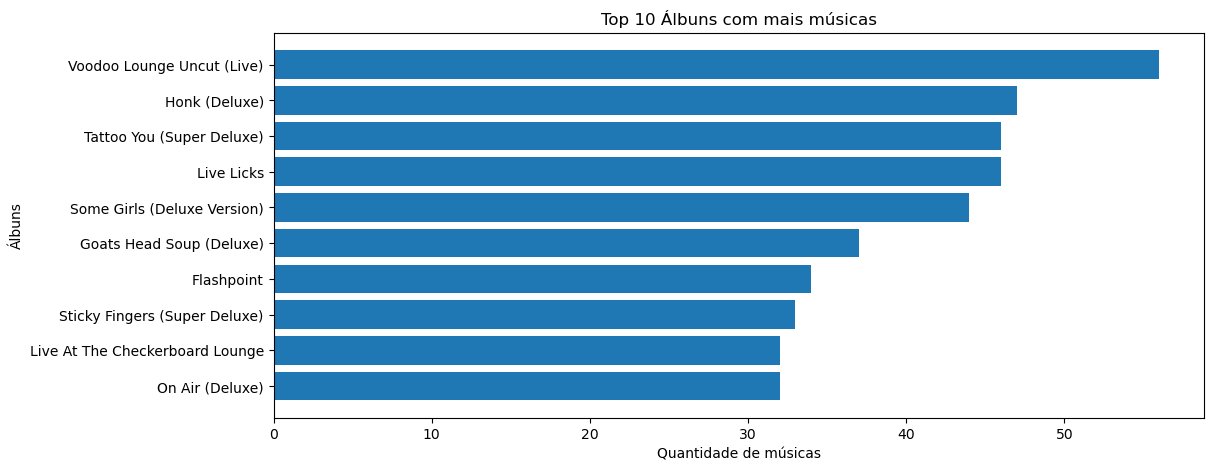

In [68]:
# Contagem da repitação da informação do album, ou seja, quantas músicas tem no album
plt.figure(figsize=(12,5))
top_albums = df['album'].value_counts().head(10)
top_albums = top_albums.sort_values(ascending=True)  # Ordena do menor para o maior (para barh)
plt.barh(top_albums.index, top_albums.values)
plt.title("Top 10 Álbuns com mais músicas")
plt.xlabel("Quantidade de músicas")
plt.ylabel("Álbuns")
plt.show()

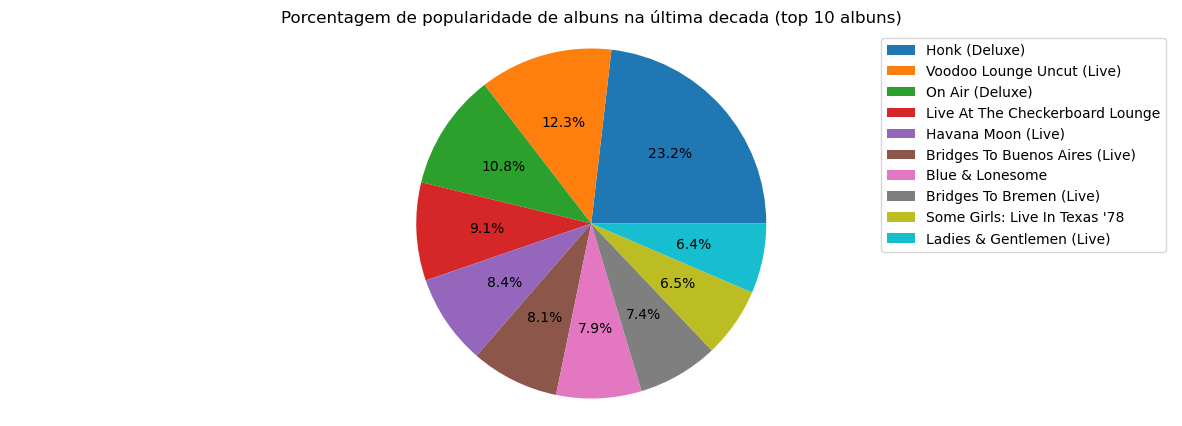

In [69]:
''' 

Seguindo a sugestão do Github Copilot, invés de usar esse código:

df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().sort_values(ascending=False).head(10)

Foi usado o código: 

df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().nlargest(10) 

Para obter de forma direta o top 10

'''

# Criar data frame da ultima decada
ano_incio = "2011"
ano_fim = "2020"

df_ultima_decada = df[df["release_date"].between(pd.to_datetime(ano_incio),pd.to_datetime(ano_fim))]

# Agrupar os dados por popularidade
df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().nlargest(10)
total_popularidade = df_por_album.sum()
df_porcentagem = (df_por_album / total_popularidade)*100
df_porcentagem

# Criar tolist que vão ser usado no grafico de pizza 
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

# Criação de grafico pizza
figura, grafico = plt.subplots(figsize=(15,5))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("Porcentagem de popularidade de albuns na última decada (top 10 albuns)")
plt.legend(labels, loc="best")
plt.show()

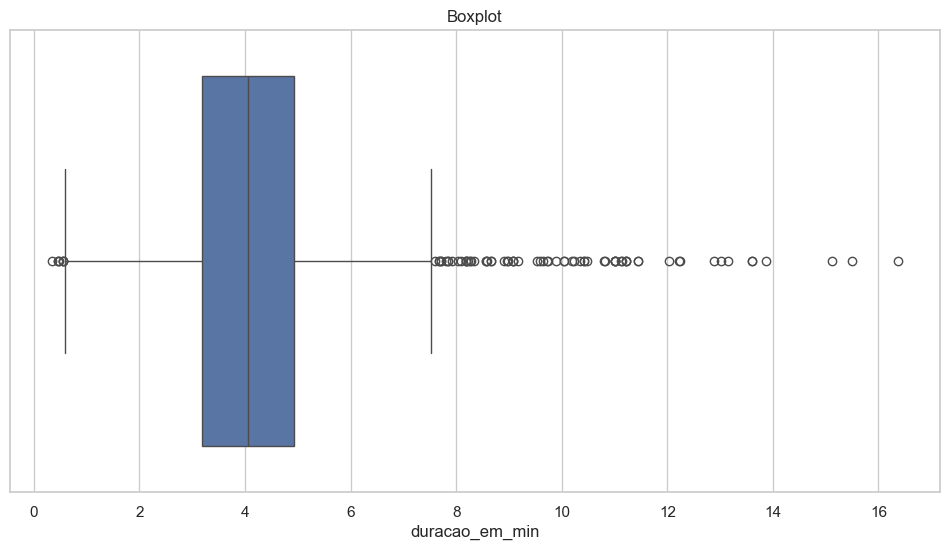

In [70]:
# Gerar o grafico boxplot

'''

Como interpretar (e construir) um gráfico boxplot?

https://fernandafperes.com.br/blog/interpretacao-boxplot/


'''

sns.set(style='whitegrid') # Definição do estilo

fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x="duracao_em_min", data=df)
axes.set_title("Boxplot")
plt.show()

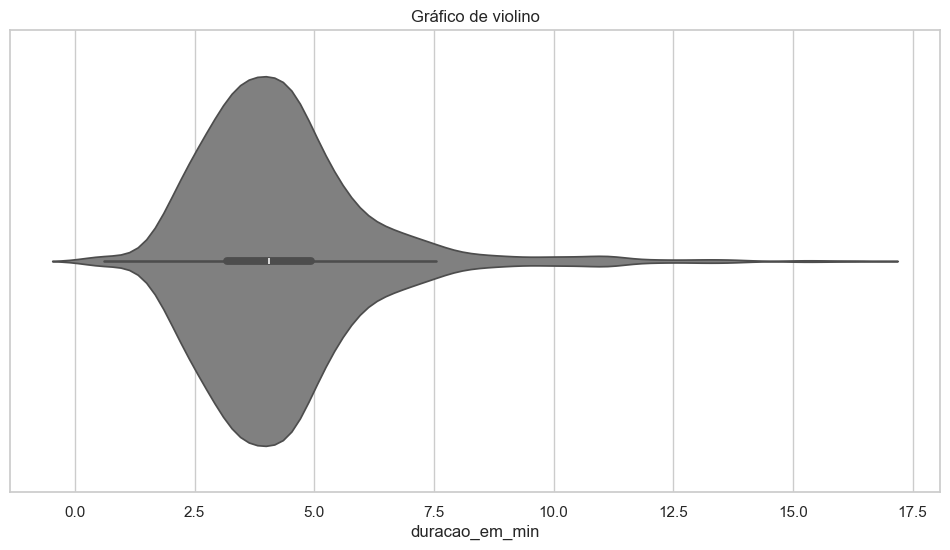

In [71]:
# Gerar grafico violion 

fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x="duracao_em_min", data=df, color="gray")
axes.set_title("Gráfico de violino")
plt.show()

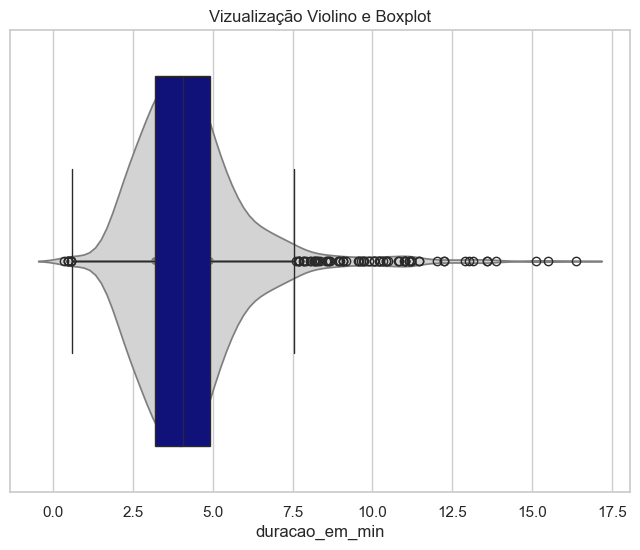

In [72]:
#Gerar o grafico boxplot e violino

fig, ax = plt.subplots(figsize=(8,6))

sns.violinplot(x="duracao_em_min", data=df, ax = ax, color="lightgray")
sns.boxplot(x="duracao_em_min", data=df, ax=ax, whis=1.5, color="darkblue")

ax.set_title("Vizualização Violino e Boxplot")
plt.show()

In [73]:
# Criar a coluna que termina se a musica é ou não ao vivo
df["ao_vivo"] = df.apply(classifica_musica_ao_vivo,axis=1)
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [74]:
df.groupby("ao_vivo")["ao_vivo"].count()

df_gravado_em_studio = df[df["ao_vivo"] == False]
df_show_ao_vivo = df[df["ao_vivo"] == True]

In [75]:
print("Média das músicas ao vivo: ", df_show_ao_vivo["duracao_em_min"].mean())

Média das músicas ao vivo:  5.088648962516734


In [76]:
print("Média das músicas ao studio: ", df_gravado_em_studio["duracao_em_min"].mean())

Média das músicas ao studio:  3.940451363908873


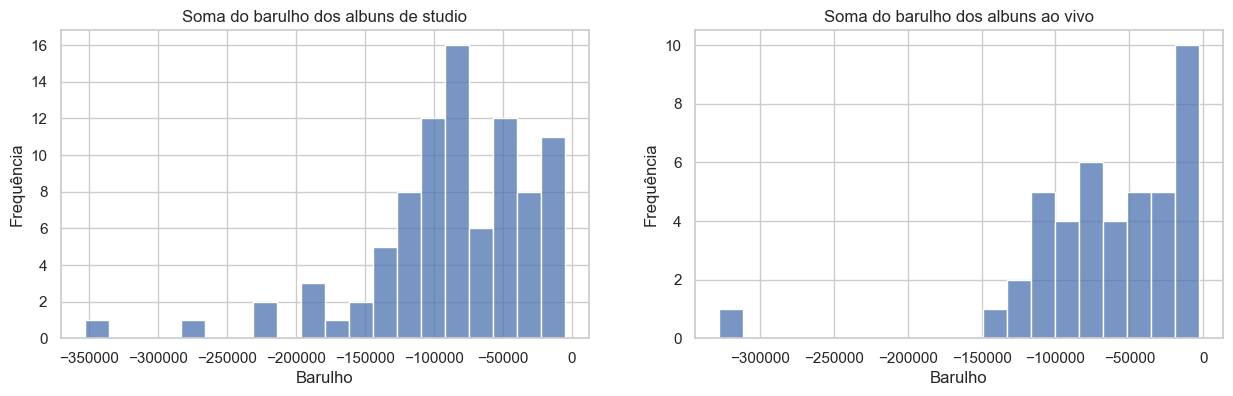

In [77]:
# Agrupado os ados por loudness

df_studio = df_gravado_em_studio.groupby("album")["loudness"].sum()
df_ao_vivo = df_show_ao_vivo.groupby("album")["loudness"].sum()

# Gerar graficos
fig, axes = plt.subplots(1, 2, figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title("Soma do barulho dos albuns de studio")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequência")

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title("Soma do barulho dos albuns ao vivo")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequência")

plt.show()


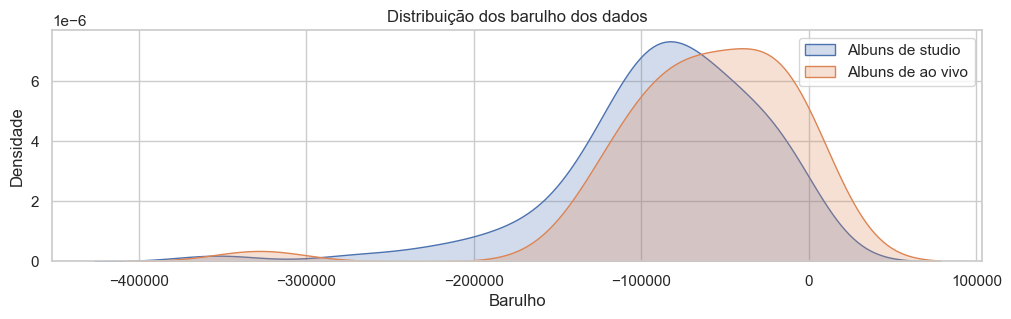

In [78]:
# Criar grafico de densidade


plt.figure(figsize=(12,3))

sns.kdeplot(data=df_studio, label = "Albuns de studio", fill = True)
sns.kdeplot(data=df_ao_vivo, label = "Albuns de ao vivo", fill = True)

plt.title("Distribuição dos barulho dos dados")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()
plt.show()

In [79]:
"""

O que é o teste de Shapiro-Wilk?
https://www.blog.psicometriaonline.com.br/o-que-e-o-teste-de-shapiro-wilk/

Uma introdução ao teste de Shapiro-Wilk para normalidade
https://builtin.com/data-science/shapiro-wilk-test

"""

# Calculo da signifcancia estatistica - Teste de shapiro

stat, p = shapiro(df_studio)
print("Soma do barulho dos albúns de studio: ")
print(f"Estatística de teste: {stat:.4f}, valor p: {p}")

if p > 0.05:
    print("Não há evidencias suficiente para rejeita a hipótese de normalidade")

else:
    print("A hipótese de normalidade é rejeitada")

Soma do barulho dos albúns de studio: 
Estatística de teste: 0.8958, valor p: 3.2961810837731026e-06
A hipótese de normalidade é rejeitada


In [80]:
# Calculo da signifcancia estatistica

stat, p = shapiro(df_ao_vivo)
print("Soma do barulho dos albúns de studio: ")
print(f"Estatística de teste: {stat:.4f}, valor p: {p}")

if p > 0.05:
    print("Não há evidencias suficiente para rejeita a hipótese de normalidade")

else:
    print("A hipótese de normalidade é rejeitada")

Soma do barulho dos albúns de studio: 
Estatística de teste: 0.7913, valor p: 2.3506009149709294e-06
A hipótese de normalidade é rejeitada


In [ ]:
# Calculo estastitica U

stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative="less") # Uso do sample para trazer dados de forma aleatoria 

print(f"Estatística de teste U: {stat}")
print(f"Valor p: {p}")

alpha = 0.05
if p < alpha:
    print("Diferença estatisticamente significante")
else:
    print("Não há diferença estatisticamente significamente")


Estatística de teste U: 1367.0
Valor p: 0.0050727361177996585
Diferença estatisticamente significante


In [ ]:
# Correlação 

media_por_album = df.groupby("album")["valence"].mean().reset_index()
media_por_album = media_por_album.rename(columns={"valence": "media_valence"})

media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]] # List Comprehension

media_por_album.groupby("sentimento")["sentimento"].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [104]:
df_resultado_final = pd.merge(df, media_por_album, on = "album")
df_resultado_final.tail()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.967,39,154080,2.568000,False,0.745583,positivo
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.446,36,245266,4.087767,False,0.745583,positivo
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.835,30,176080,2.934667,False,0.745583,positivo
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.532,27,121680,2.028000,False,0.745583,positivo
1609,Walking The Dog,The Rolling Stones,1964-04-16,12,0.3830,0.727,0.934,0.068500,0.0965,-8373.0,0.0359,125275.00,0.969,35,189186,3.153100,False,0.745583,positivo


#### Aula 3 - Feature Engineering


#### Aula 4 - Avaliando o Melhor Modelo de Regressão

#### Aula 5 - Limitações e os Modelos de Classificação